In [143]:
import hashlib
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import math 
from itertools import combinations

In [144]:
csv_file ='../data/file_information.csv'
plagiarism_df = pd.read_csv(csv_file)

# print out the first few rows of data info
plagiarism_df.head()

,File,Task,Category
0,g0pA_taska.txt,a,non
1,g0pA_taskb.txt,b,cut
2,g0pA_taskc.txt,c,light
3,g0pA_taskd.txt,d,heavy
4,g0pA_taske.txt,e,non


In [145]:
# Read in a csv file and return a transformed dataframe
def numerical_dataframe(csv_file='../data/file_information.csv'):
    '''Reads in a csv file which is assumed to have `File`, `Category` and `Task` columns.
       This function does two things: 
       1) converts `Category` column values to numerical values 
       2) Adds a new, numerical `Class` label column.
       The `Class` column will label plagiarized answers as 1 and non-plagiarized as 0.
       Source texts have a special label, -1.
       :param csv_file: The directory for the file_information.csv file
       :return: A dataframe with numerical categories and a new `Class` label column'''
    
    # read in csv file
    num_df = pd.read_csv(csv_file)
    
    # convert Category column to numerical values
    cat_num = {'non': 0, 'heavy': 1, 'light': 2, 'cut': 3, 'orig': -1}
    num_df['Category'] = num_df['Category'].map(cat_num)
    
    # add Class column
    num_df['Class'] = [ x if x < 1 else 1 for x in num_df['Category'] ]
    
    return num_df

In [146]:
# informal testing, print out the results of a called function
# create new `transformed_df`
transformed_df = numerical_dataframe(csv_file = '../data/file_information.csv')

# check work
# check that all categories of plagiarism have a class label = 1
transformed_df.head(10)

,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0
5,g0pB_taska.txt,a,0,0
6,g0pB_taskb.txt,b,0,0
7,g0pB_taskc.txt,c,3,1
8,g0pB_taskd.txt,d,2,1
9,g0pB_taske.txt,e,1,1


In [147]:
# test cell that creates `transformed_df`, if tests are passed

"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""

# importing tests
import problem_unittests as tests

# test numerical_dataframe function
tests.test_numerical_df(numerical_dataframe)

# if above test is passed, create NEW `transformed_df`
transformed_df = numerical_dataframe(csv_file ='../data/file_information.csv')

# check work
print('\nExample data: ')
transformed_df.head()

Tests Passed!

Example data: 


,File,Task,Category,Class
0,g0pA_taska.txt,a,0,0
1,g0pA_taskb.txt,b,3,1
2,g0pA_taskc.txt,c,2,1
3,g0pA_taskd.txt,d,1,1
4,g0pA_taske.txt,e,0,0


In [148]:
"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
import helpers 

# create a text column 
text_df = helpers.create_text_column(transformed_df, '../data/')
text_df.head()

file_path: ../data/g0pA_taska.txt
file_path: ../data/g0pA_taskb.txt
file_path: ../data/g0pA_taskc.txt
file_path: ../data/g0pA_taskd.txt
file_path: ../data/g0pA_taske.txt
file_path: ../data/g0pB_taska.txt
file_path: ../data/g0pB_taskb.txt
file_path: ../data/g0pB_taskc.txt
file_path: ../data/g0pB_taskd.txt
file_path: ../data/g0pB_taske.txt
file_path: ../data/g0pC_taska.txt
file_path: ../data/g0pC_taskb.txt
file_path: ../data/g0pC_taskc.txt
file_path: ../data/g0pC_taskd.txt
file_path: ../data/g0pC_taske.txt
file_path: ../data/g0pD_taska.txt
file_path: ../data/g0pD_taskb.txt
file_path: ../data/g0pD_taskc.txt
file_path: ../data/g0pD_taskd.txt
file_path: ../data/g0pD_taske.txt
file_path: ../data/g0pE_taska.txt
file_path: ../data/g0pE_taskb.txt
file_path: ../data/g0pE_taskc.txt
file_path: ../data/g0pE_taskd.txt
file_path: ../data/g0pE_taske.txt
file_path: ../data/g1pA_taska.txt
file_path: ../data/g1pA_taskb.txt
file_path: ../data/g1pA_taskc.txt
file_path: ../data/g1pA_taskd.txt
file_path: ../

,File,Task,Category,Class,Text
0,g0pA_taska.txt,a,0,0,inheritance is a basic concept of object orien...
1,g0pA_taskb.txt,b,3,1,pagerank is a link analysis algorithm used by ...
2,g0pA_taskc.txt,c,2,1,the vector space model also called term vector...
3,g0pA_taskd.txt,d,1,1,bayes theorem was names after rev thomas bayes...
4,g0pA_taske.txt,e,0,0,dynamic programming is an algorithm design tec...


In [149]:
# after running the cell above
# check out the processed text for a single file, by row index
row_idx = 99 # feel free to change this index

sample_text = text_df.iloc[99]['Text']

print('Sample processed text:\n\n', sample_text)
print("total number of documents: ", len(text_df))

Sample processed text:

 in mathematics and computer science dynamic programming is a method of solving problems that exhibit the properties of overlapping subproblems and optimal substructure described below  the method takes much less time than naive methods the term was originally used in the 1940s by richard bellman to describe the process of solving problems where one needs to find the best decisions one after another by 1953 he had refined this to the modern meaning the field was founded as a systems analysis and engineering topic that is recognized by the ieee bellman s contribution is remembered in the name of the bellman equation a central result of dynamic programming which restates an optimization problem in recursive form the word programming in dynamic programming has no particular connection to computer programming at all and instead comes from the term mathematical programming  a synonym for optimization thus the program is the optimal plan for action that is produced fo

In [150]:
documents = text_df['Text'].tolist()
print("total number of documents: ", len(documents))
print("documents: ", documents)

total number of documents:  100
documents:  ['inheritance is a basic concept of object oriented programming where the basic idea is to create new classes that add extra detail to existing classes this is done by allowing the new classes to reuse the methods and variables of the existing classes and new methods and classes are added to specialise the new class inheritance models the is kind of relationship between entities or objects  for example postgraduates and undergraduates are both kinds of student this kind of relationship can be visualised as a tree structure where student would be the more general root node and both postgraduate and undergraduate would be more specialised extensions of the student node or the child nodes  in this relationship student would be known as the superclass or parent class whereas  postgraduate would be known as the subclass or child class because the postgraduate class extends the student class  inheritance can occur on several layers where if visuali

Shingling

In [151]:
# class Shingling:
#     def __init__(self, k):
#         self.k = k  # Shingle size
#         self.shingles = set()  # Set to store unique shingles
#         self.hashed_shingles = []  # List to store hashed shingles in order

#     def shingle_document(self, document):
#         shingles = set()  
#         hashed_shingles = []

#         for i in range(len(document) - self.k + 1):
#             shingle = document[i:i + self.k]
#             shingle_hash = hashlib.sha1(shingle.encode()).hexdigest()  # Use SHA-1 for hashing
#             shingles.add(shingle)
#             hashed_shingles.append(shingle_hash)

#         return shingles, hashed_shingles

#     def process_document(self, document):
#         shingles, hashed_shingles = self.shingle_document(document)
#         self.shingles.update(shingles)
#         self.hashed_shingles.extend(hashed_shingles)

#     def get_ordered_hashed_shingles(self):
#         return sorted(self.hashed_shingles)
    





class Shingling:
    def __init__(self, k):
        self.k = k  # Shingle size
        self.shingles = set()  # Set to store unique shingles
        self.hashed_shingles = []  # List to store hashed shingles in order
        self.hashed_number = set()
        self.number = 0
        self.hash_dict = {}
    

    def shingle_document(self, document):
        shingles = set()  
        hashed_number = set()

        for i in range(len(document) - self.k + 1):
            shingle = document[i:i + self.k]
            # shingle_hash = hashlib.sha1(shingle.encode()).hexdigest()  # Use SHA-1 for hashing
            shingle_hash_number = self.hash(shingle)
            
            hashed_number.add(shingle_hash_number)
            # shingles.add(shingle)
            # hashed_shingles.append(shingle_hash)

        return hashed_number
    
    def hash(self,string):
        if string not in self.hash_dict:
            self.number += 1
            self.hash_dict[string] = self.number
            # self.shingles.add(string)
        return self.hash_dict[string] 


    def process_document(self, document):
        shingles, hashed_shingles = self.shingle_document(document)
        self.shingles.update(shingles)
        self.hashed_shingles.extend(hashed_shingles)

    def get_ordered_hashed_shingles(self):
        return sorted(self.hashed_shingles)

path

In [152]:


# Initialize the shingling class with your desired shingle size
shingling = Shingling(k=10)  # You can choose an appropriate value for 'k'

# Loop through your files and process the content
# for filename in os.listdir(directory):
#     if filename.endswith(".txt"):
#         with open(os.path.join(directory, filename), 'r') as file:
#             content = file.read()
#             shingling.process_document(content)





sets=[]
for i in range(len(text_df)):
    # print(i)
    shringling_set=shingling.shingle_document(text_df.iloc[i]['Text'])
    sets.append(shringling_set)


# print("Number of unique shingles:", len(shingling.shingles))
# print("Number of total shingles:", len(shingling.hashed_shingles))

# # Get the ordered set of hashed shingles for the entire document
# ordered_hashed_shingles = shingling.get_ordered_hashed_shingles()
# print("Ordered Hashed Shingles:", ordered_hashed_shingles[0])
# print("Ordered Hashed Shingles:", ordered_hashed_shingles[3])
print()
print("sets: ", sets[0])
print("sets: ", sets[2])


sets:  {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220,

In [153]:
def min_hash(shingling,hash_length):
    generator=np.random.default_rng(seed=666)
    MIN_VALUE=-2**31
    MAX_VALUE=2**31-1
    parameters=generator.choice(a=generator.integers(
        low=MIN_VALUE,high=MAX_VALUE,size=hash_length*2
    ),size=(hash_length,2),replace=False
                                )
    # print("paraneters:",parameters)
    return np.asarray(
        [
            min(
                map(
                    lambda x: (x * parameters[0] + parameters[1]) % MAX_VALUE,
                    shingling
                )
            )
            for parameters in parameters
        ]
    )


In [154]:
def compare_sets(A:set,B:set)->float:
    return len(A&B)/len(A|B)

In [155]:
def compare_signatures(A:np.array,B:np.array)->float:
    return sum(A==B)/len(A)

Experiments1-CompareSets

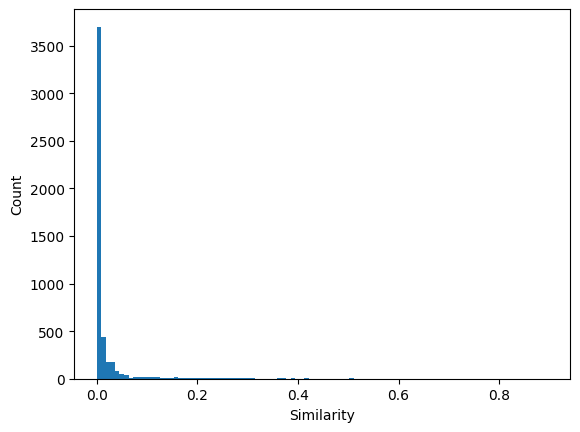

In [156]:
similarity=[]
for i in range(len(sets)):
    s1=sets[i]
    for j in range(i+1,len(sets)):
        s2=sets[j]
        similarity.append(compare_sets(s1,s2))
plt.hist(similarity,bins=100)
plt.xlabel("Similarity")
plt.ylabel("Count")
plt.show()

MinHashing

In [157]:
print(min_hash(sets[0],99))



[  2086960   1106216    683411   1106323    346409    142387    460560
    854159    401415   4915368    880865    482054   3865299   1131040
    572676   1654041    699368   1214281    983137    192941   1008105
   1868288    861571   1051988   1298533   1594991   2131744    144638
   1967049    348711    714831    845898    380539   4697607    888686
    534451  45141615    199105   2263441  11573634   2059246    596203
    480348    561972    215830   4272013   1018892    427075   2013639
   4950498    681612   1765892    713123   1801847   8765285    845001
    243806    461965    355905   1646355    269005   7559665  16326658
    504664    181301   1104821   1402727   1148086    655084   2657070
   2050404   1574335   1010980    766680   1356634   1441435    146201
   1565605    832157     14779    855735   1005700   1923132    916120
   1198561    216060   1870232   3557137   1574549   2235580 400000773
   5092260   2431249    649946    494832   1156846    366646    744330
    31

Execution time tests

In [158]:
import time
THRESHOLD=0.3
def compute_similarity(documents):
    similarity=np.zeros((len(documents),len(documents)))
    start=time.time()
    shingling = Shingling(k=10)  # You can choose an appropriate value for 'k'
    sets=[]
    length=len(documents)
    for i in range(length):
        # shringling_set=shingling.shingle_document(documents.iloc[i]['Text'])
        shringling_set=shingling.shingle_document(documents[i])
        sets.append(shringling_set)
    # similarities=np.zeros((length,length))
    for i in range(len(sets)):
        s1=sets[i]
        for j in range(i+1,len(sets)):
            s2=sets[j]
            similarity[i,j]=compare_sets(s1,s2)
    similar_index=np.argwhere(similarity>THRESHOLD)
    time_cost=time.time()-start
    return time_cost,similar_index



# time_cost,similar_index=compute_similarity(text_df)
# print("time cost: ", time_cost)
# print("similar index: ", similar_index)


In [163]:
def compute_similarity_lsh(documents, band_size):
    similarity=np.zeros((len(documents),len(documents)))
    start=time.time()
    shingling = Shingling(k=10)  # You can choose an appropriate value for 'k'
    sets=[]
    length=len(documents)
    for i in range(length):
        # shringling_set=shingling.shingle_document(documents.iloc[i]['Text'])
        shringling_set=shingling.shingle_document(documents[i])
        sets.append(shringling_set)    
    min_hashes = np.array([min_hash(token, 100) for token in sets]).T
    # print("min_hashes: ", min_hashes)
    similar_index = lsh(min_hashes, THRESHOLD, band_size)
    # print("similar_items: ", similar_items)
    

    time_cost = time.time() - start
    return time_cost,similar_index


In [160]:
def hash_band(band):
    """
    This function might be changed later to improve performance. It is meant to hash the band of each document.
    :param band: the matrix of shape (band_length, documents_number)
    :return: an array of shape (1, documents_number) containing the hashed band for each document
    """
    hash_values = np.array([hash(tuple(col)) for col in band.T])
    return hash_values.T


def lsh(M: np.ndarray, t: float, b: int = 1) -> set[tuple[int, int]]:
    """
    This function takes as input the minhash signatures of M.shape[1] documents and returns all the pairs of documents
    with estimated similarity larger than t.
    :param M: matrix having as columns the signatures of the documents
    :param t: threshold for the similarity
    :param b: number of bands
    :return: the pairs of indices of documents with estimated similarity larger than t
    """
    candidates: set[tuple[int, int]] = set()
    hash_length: int = len(M)
    documents_number: int = M.shape[1]
    band_length: int = math.ceil(hash_length / b)

    for band_index in range(0, hash_length, band_length):
        collision_hashmap: dict[int, Set[int]] = {}

        # shape (band_length, documents_number)
        band = M[band_index: min(band_index + band_length, hash_length), :]

        # shape (1, documents_number)
        hashed_band = hash_band(band)

        for document_index in range(documents_number):
            document_band_hash = hashed_band[document_index]

            if document_band_hash in collision_hashmap:
                collision_hashmap[document_band_hash].add(document_index)
            else:
                collision_hashmap[document_band_hash] = {document_index}

        for collision_set in collision_hashmap.values():
            candidates |= set(combinations(collision_set, 2))

    return set(
        filter(
            lambda pair: compare_signatures(M[:, pair[0]], M[:, pair[1]]) >= t,
            candidates
        )
    )


In [164]:
generator = np.random.default_rng(seed=42)

# n_documents = [10, 100, 500, 1000, 2000, 3000, 4000, 5000]

n_documents = [10,30, 50,80,100]
durations = []
approx_durations = []
band_size = 50

for n in n_documents:
#   sh = Shingling()
  document = generator.choice(documents, n)
  
  # approx_duration, approx_similar_items = get_approximated_similar_items(sh, documents, band_size)

  approx_duration, approx_similar_index = compute_similarity_lsh(document, band_size)


  duration, similar_index = compute_similarity(document)
  
  approx_durations.append(approx_duration)
  durations.append(duration)

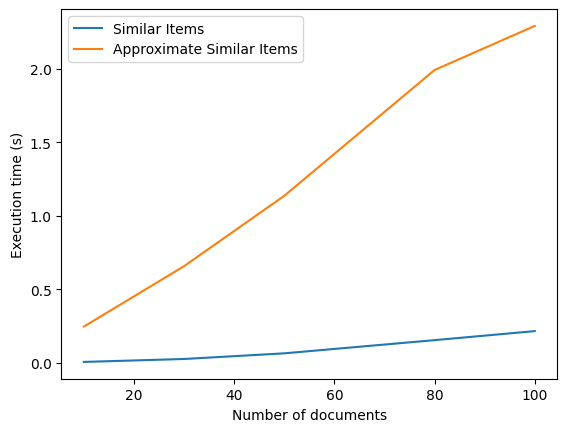

In [165]:
plt.plot(n_documents, durations, label='Similar Items')
plt.plot(n_documents, approx_durations, label='Approximate Similar Items')
plt.xlabel('Number of documents')
plt.ylabel('Execution time (s)')
plt.legend()
plt.show()